In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv('C:/3курс/tms/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
# Предобработка данных
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [92]:
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features]

In [93]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

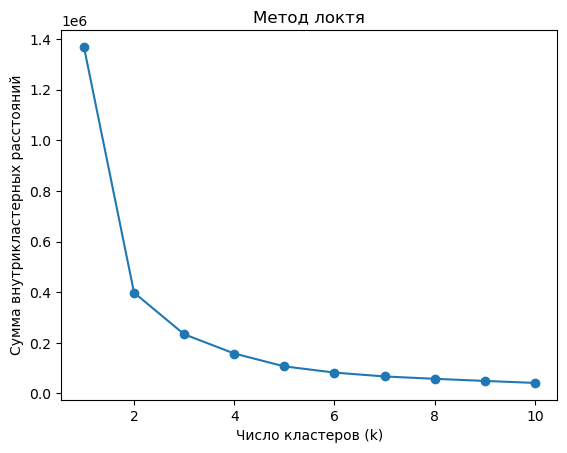

In [95]:
# метод локтя для выбора оптимального k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=15)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Метод локтя")
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний")
plt.show()

In [96]:
# Кластеризация KMeans с k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=15)
df['KMeans_Group'] = kmeans.fit_predict(X_scaled)
print(df.groupby('KMeans_Group')[n].mean())
print(df['KMeans_Group'].value_counts().sort_index())

                   Sex        Age     SibSp     Parch        Fare
KMeans_Group                                                     
0             0.000000  28.801281  0.231405  0.115702   19.059831
1             0.650000  47.137500  0.750000  0.775000  171.925315
2             1.000000  26.332705  0.426230  0.483607   22.958710
3             0.285714  21.750000  3.500000  3.285714   41.466964
KMeans_Group
0    242
1     40
2    122
3     14
Name: count, dtype: int64


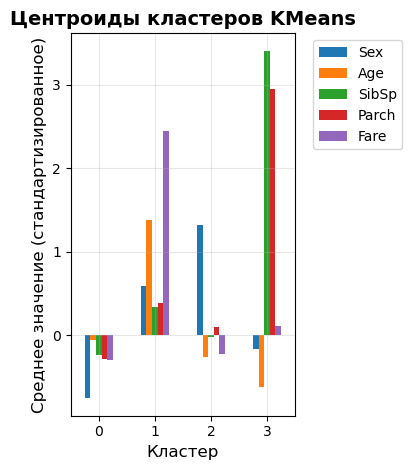

In [99]:
# Визуализация центроидов кластеров KMeans
plt.subplot(1, 2, 2)
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=features)
centroids_df.plot(kind='bar', ax=plt.gca())
plt.title('Центроиды кластеров KMeans', fontsize=14, fontweight='bold')
plt.xlabel('Кластер', fontsize=12)
plt.ylabel('Среднее значение (стандартизированное)', fontsize=12)
plt.xticks(range(4), rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

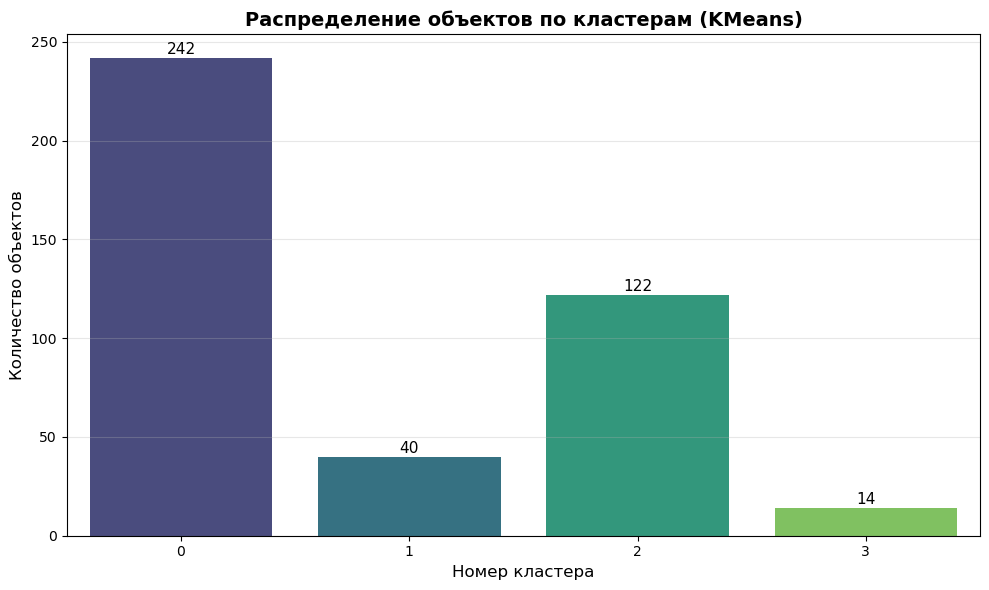

In [88]:

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='KMeans_Group', palette='viridis')

plt.title('Распределение объектов по кластерам (KMeans)', fontsize=14, fontweight='bold')
plt.xlabel('Номер кластера', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)

# Добавляем числа над столбцами
for i, count in enumerate(df['KMeans_Group'].value_counts().sort_index()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=11)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [100]:
# Кластеризация DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
df['DBSCAN'] = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_
df['cluster'] = dbscan.labels_
n_ = list(df['DBSCAN']).count(-1)
print(n_)
print(df.tail())

101
     PassengerId  Survived  Pclass                          Name  Sex   Age  \
413         1305         0       3            Spector, Mr. Woolf    0  27.0   
414         1306         1       1  Oliva y Ocana, Dona. Fermina    1  39.0   
415         1307         0       3  Saether, Mr. Simon Sivertsen    0  38.5   
416         1308         0       3           Ware, Mr. Frederick    0  27.0   
417         1309         0       3      Peter, Master. Michael J    0  27.0   

     SibSp  Parch              Ticket      Fare Cabin Embarked  KMeans_Group  \
413      0      0           A.5. 3236    8.0500   NaN        S             0   
414      0      0            PC 17758  108.9000  C105        C             1   
415      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S             0   
416      0      0              359309    8.0500   NaN        S             0   
417      1      1                2668   22.3583   NaN        C             0   

     DBSCAN  cluster  
413       0      

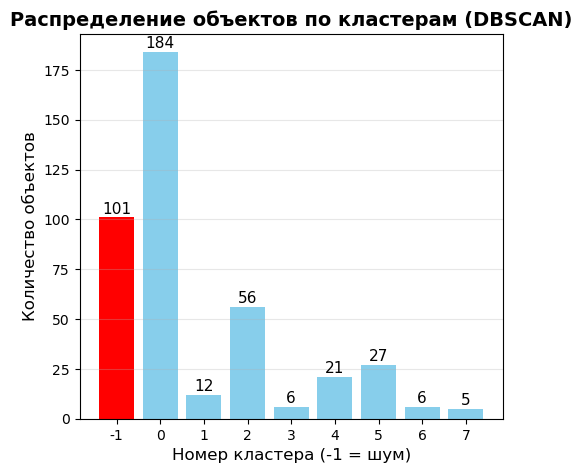

In [101]:
# Визуализация результатов DBSCAN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
dbscan_counts = df['DBSCAN'].value_counts().sort_index()
bars = plt.bar(range(len(dbscan_counts)), dbscan_counts.values, 
               color=['red' if i == -1 else 'skyblue' for i in dbscan_counts.index])
plt.title('Распределение объектов по кластерам (DBSCAN)', fontsize=14, fontweight='bold')
plt.xlabel('Номер кластера (-1 = шум)', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.xticks(range(len(dbscan_counts)), dbscan_counts.index)
for bar, count in zip(bars, dbscan_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom', fontsize=11)
plt.grid(axis='y', alpha=0.3)

In [107]:
# Сравнение
print("ГРУППЫ KMEANS")

# KMeans группы
for i in range(4):
    group = df[df['KMeans_Group'] == i]
    print(f"\nГруппа {i}: {len(group)} чел ({len(group)/len(df)*100:.0f}%)")
    print(f"  Женщин: {group['Sex'].mean()*100:.0f}%")
    print(f"  Возраст: {group['Age'].mean():.0f} лет")
    print(f"  Цена билета: ${group['Fare'].mean():.0f}")
    print(f"  Выжило: {group['Survived'].mean()*100:.0f}%")

print("\nГРУППЫ DBSCAN")

# DBSCAN результаты
noise = (df['DBSCAN'] == -1).sum()
print(f"Не попали в группы (шум): {noise} чел ({noise/len(df)*100:.0f}%)")

# 3 самые большие группы DBSCAN
top_groups = df[df['DBSCAN'] != -1]['DBSCAN'].value_counts().head(3)
print("\nСамые большие группы:")
for group_num, count in top_groups.items():
    g_data = df[df['DBSCAN'] == group_num]
    print(f"  Группа {group_num}: {count} чел")
    print(f"    Возраст: {g_data['Age'].mean():.0f} лет")
    print(f"    Цена: ${g_data['Fare'].mean():.0f}")

ГРУППЫ KMEANS

Группа 0: 242 чел (58%)
  Женщин: 0%
  Возраст: 29 лет
  Цена билета: $19
  Выжило: 0%

Группа 1: 40 чел (10%)
  Женщин: 65%
  Возраст: 47 лет
  Цена билета: $172
  Выжило: 65%

Группа 2: 122 чел (29%)
  Женщин: 100%
  Возраст: 26 лет
  Цена билета: $23
  Выжило: 100%

Группа 3: 14 чел (3%)
  Женщин: 29%
  Возраст: 22 лет
  Цена билета: $41
  Выжило: 29%

ГРУППЫ DBSCAN
Не попали в группы (шум): 101 чел (24%)

Самые большие группы:
  Группа 0: 184 чел
    Возраст: 29 лет
    Цена: $16
  Группа 2: 56 чел
    Возраст: 26 лет
    Цена: $13
  Группа 5: 27 чел
    Возраст: 33 лет
    Цена: $29
